<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/NPML001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilities

The utilities module implements a number of useful functions and objects that
power other ML algorithms across the repo.

- `data_structures.py` implements a few useful data structures
    - A max- and min-heap ordered priority queue
    - A ball tree with the KNS1 algorithm
    - A discrete sampler implementing Vose's algorithm for the alias method
    
- `kernels.py` implements several general-purpose similarity kernels
    - Linear kernel
    - Polynomial kernel
    - Radial basis function kernel

- `distance_metrics.py` implements common distance metrics
    - Euclidean (L2) distance
    - Manhattan (L1) distance
    - Chebyshev (L-infinity) distance
    - Minkowski-p distance
    - Hamming distance

- `graphs.py` implements simple data structures and algorithms for graph processing
    - Undirected + directed graph objects allowing for probabilistic edge weights
    - Graph generators (Erdos-Renyi, random DAGs)
    - Topological sorting for DAGs
    - Cycle detection
    - Simple path-finding

- `windows.py` implements several common windowing functions
    - Hann
    - Hamming
    - Blackman-Harris
    - Generalized cosine

- `testing.py` implements helper functions that prove useful when writing unit tests, including data generators and various assert statements

In [1]:
%%writefile testing.py

"""
此模块提供了一些用于编写单元测试的实用程序。
主要功能包括：
- 断言：用于检查代码的正确性。
- 数据生成器：用于生成测试数据。
- 自定义警告：用于定义自定义警告类型。
"""
import numbers
import numpy as np

# 断言部分
def is_symmetric(X):
    """
    检查数组 X 是否沿主对角线对称。

    参数：
        X：待检查的数组。

    返回值：
        如果数组 X 对称，则返回 True，否则返回 False。
    """
    return np.allclose(X, X.T)

def is_symmetric_positive_definite(X):
    """
    检查矩阵 X 是否对称且正定。

    参数：
        X：待检查的矩阵。

    返回值：
        如果矩阵 X 对称且正定，则返回 True，否则返回 False。
    """
    if is_symmetric(X):
        try:
            # 尝试对 X 进行 Cholesky 分解，如果分解成功，则矩阵 X 对称且正定。
            np.linalg.cholesky(X)
            return True
        except np.linalg.LinAlgError:
            return False
    return False

def is_stochastic(X):
    """
    检查矩阵 X 是否为随机矩阵，即每行元素之和为 1。

    参数：
        X：待检查的矩阵。

    返回值：
        如果矩阵 X 为随机矩阵，则返回 True，否则返回 False。
    """
    msg = "矩阵 X 应该是一个随机矩阵，即每行元素之和为 1。"
    assert len(X[X < 0]) == len(X[X > 1]) == 0, msg  # 所有元素都应在 0 到 1 之间
    assert np.allclose(np.sum(X, axis=1), np.ones(X.shape[0])), msg  # 每行元素之和应为 1
    return True

def is_number(a):
    """
    检查值 a 是否为数值类型。

    参数：
        a：待检查的值。

    返回值：
        如果值 a 为数值类型，则返回 True，否则返回 False。
    """
    return isinstance(a, numbers.Number)

def is_one_hot(x):
    """
    检查数组 x 是否为 one-hot 编码，即每行只有一个元素为 1，其余元素为 0。

    参数：
        x：待检查的数组。

    返回值：
        如果数组 x 为 one-hot 编码，则返回 True，否则返回 False。
    """
    msg = "数组 x 应该是一个 one-hot 编码，即每行只有一个元素为 1，其余元素为 0。"
    assert np.array_equal(x, x.astype(bool)), msg  # 所有元素都应为 0 或 1
    assert np.allclose(np.sum(x, axis=1), np.ones(x.shape[0])), msg  # 每行元素之和应为 1
    return True

def is_binary(x):
    """
    检查数组 x 是否为二进制数组，即所有元素都为 0 或 1。

    参数：
        x：待检查的数组。

    返回值：
        如果数组 x 为二进制数组，则返回 True，否则返回 False。
    """
    msg = "数组 x 应该是一个二进制数组，即所有元素都为 0 或 1。"
    assert np.array_equal(x, x.astype(bool)), msg  # 所有元素都应为 0 或 1
    return True

# 数据生成器部分
def random_one_hot_matrix(n_examples, n_classes):
    """
    生成一个形状为 (n_examples, n_classes) 的随机 one-hot 矩阵。

    参数：
        n_examples：样本数量。
        n_classes：类别数量。

    返回值：
        生成的随机 one-hot 矩阵。
    """
    X = np.eye(n_classes)
    X = X[np.random.choice(n_classes, n_examples)]
    return X

def random_stochastic_matrix(n_examples, n_classes):
    """
    生成一个形状为 (n_examples, n_classes) 的随机随机矩阵，
    即每行元素之和为 1。

    参数：
        n_examples：样本数量。
        n_classes：类别数量。

    返回值：
        生成的随机随机矩阵。
    """
    X = np.random.rand(n_examples, n_classes)
    X /= X.sum(axis=1, keepdims=True)  # 归一化，使每行元素之和为 1
    return X

def random_tensor(shape, standardize=False):
    """
    生成一个形状为 shape 的随机实值张量。

    参数：
        shape：张量的形状。
        standardize：是否对张量进行标准化，
            使每列的均值为 0，标准差为 1。
            默认为 False。

    返回值：
        生成的随机实值张量。
    """
    offset = np.random.randint(-300, 300, shape)
    X = np.random.rand(*shape) + offset

    if standardize:
        eps = np.finfo(float).eps  # 防止除以 0
        X = (X - X.mean(axis=0)) / (X.std(axis=0) + eps)
    return X

def random_binary_tensor(shape, sparsity=0.5):
    """
    生成一个形状为 shape 的随机二进制张量，
    其中 0 和 1 的比例由 sparsity 控制。

    参数：
        shape：张量的形状。
        sparsity：稀疏度，即 0 的比例。
            默认为 0.5。

    返回值：
        生成的随机二进制张量。
    """
    return (np.random.rand(*shape) >= (1 - sparsity)).astype(float)

def random_paragraph(n_words, vocab=None):
    """
    生成一个由 n_words 个单词组成的随机段落。

    参数：
        n_words：单词数量。
        vocab：词汇表，默认为 None，
            表示使用默认的拉丁单词词汇表。

    返回值：
        生成的随机段落。
    """
    if vocab is None:
        vocab = [
            "at", "stet", "accusam", "aliquyam", "clita", "lorem",
            "ipsum", "dolor", "dolore", "dolores", "sit", "amet",
            "consetetur", "sadipscing", "elitr", "sed", "diam",
            "nonumy", "eirmod", "duo", "ea", "eos", "erat", "est",
            "et", "gubergren"
        ]
    return [np.random.choice(vocab) for _ in range(n_words)]

# 自定义警告部分
class DependencyWarning(RuntimeWarning):
    """
    自定义警告类型，用于指示依赖项问题。
    """
    pass

Writing testing.py


In [2]:
%%writefile distance_metrics.py

import numpy as np


def euclidean(x, y):
    """
    计算两个实值向量之间的欧几里得距离（L2 距离）。

    参数：
        x：第一个向量。
        y：第二个向量。

    返回值：
        x 和 y 之间的欧几里得距离。
    """
    return np.sqrt(np.sum((x - y) ** 2))


def manhattan(x, y):
    """
    计算两个实值向量之间的曼哈顿距离（L1 距离）。

    参数：
        x：第一个向量。
        y：第二个向量。

    返回值：
        x 和 y 之间的曼哈顿距离。
    """
    return np.sum(np.abs(x - y))


def chebyshev(x, y):
    """
    计算两个实值向量之间的切比雪夫距离（L-∞ 距离）。

    参数：
        x：第一个向量。
        y：第二个向量。

    返回值：
        x 和 y 之间的切比雪夫距离。
    """
    return np.max(np.abs(x - y))


def minkowski(x, y, p):
    """
    计算两个实值向量之间的闵可夫斯基距离（Lp 距离）。

    参数：
        x：第一个向量。
        y：第二个向量。
        p：距离度量参数。

    返回值：
        x 和 y 之间的闵可夫斯基距离。
    """
    return np.sum(np.abs(x - y) ** p) ** (1 / p)


def hamming(x, y):
    """
    计算两个整数值向量之间的汉明距离。

    参数：
        x：第一个向量。
        y：第二个向量。

    返回值：
        x 和 y 之间的汉明距离。
    """
    return np.sum(x != y) / len(x)

Writing distance_metrics.py


In [3]:
%%writefile data_structures.py

import heapq
from copy import copy
from collections.abc import Hashable  # 使用 collections.abc 而不是 collections

import numpy as np


class PQNode:
    """
    优先队列节点类，用于存储优先队列中的元素。

    属性：
        key：节点的键。
        val：节点的值。
        priority：节点的优先级。
        entry_id：节点的唯一标识符。
    """
    def __init__(self, key, val, priority, entry_id, **kwargs):
        self.key = key
        self.val = val
        self.entry_id = entry_id
        self.priority = priority

    def __repr__(self):
        return "PQNode(key={}, val={}, priority={}, entry_id={})".format(
            self.key, self.val, self.priority, self.entry_id
        )

    def to_dict(self):
        """将节点内容转换为字典表示。"""
        d = self.__dict__
        d["id"] = "PQNode"
        return d

    def __gt__(self, other):
        if not isinstance(other, PQNode):
            return -1
        if self.priority == other.priority:
            return self.entry_id > other.entry_id
        return self.priority > other.priority

    def __ge__(self, other):
        if not isinstance(other, PQNode):
            return -1
        return self.priority >= other.priority

    def __lt__(self, other):
        if not isinstance(other, PQNode):
            return -1
        if self.priority == other.priority:
            return self.entry_id < other.entry_id
        return self.priority < other.priority

    def __le__(self, other):
        if not isinstance(other, PQNode):
            return -1
        return self.priority <= other.priority


class PriorityQueue:
    """
    优先队列类，使用二叉堆实现。

    属性：
        capacity：队列的最大容量。
        heap_order：堆的顺序，可以是 'max' 或 'min'。
        _pq：存储队列元素的列表。
        _count：队列中元素的数量。
        _entry_counter：用于生成节点唯一标识符的计数器。
    """
    def __init__(self, capacity, heap_order="max"):
        assert heap_order in ["max", "min"], "heap_order 必须是 'max' 或 'min'"
        self.capacity = capacity
        self.heap_order = heap_order

        self._pq = []
        self._count = 0
        self._entry_counter = 0

    def __repr__(self):
        return "PriorityQueue(capacity={}, heap_order={}) with {} items".format(
            self.capacity, self.heap_order, self._count
        )

    def __len__(self):
        return self._count

    def __iter__(self):
        return iter(self._pq)

    def push(self, key, priority, val=None):
        """
        向队列中添加一个新的 (key, value) 对，并指定优先级。

        参数：
            key：节点的键。
            priority：节点的优先级。
            val：节点的值，默认为 None。
        """
        if self.heap_order == "max":
            priority = -1 * priority

        item = PQNode(
            key=key, val=val, priority=priority, entry_id=self._entry_counter
        )
        heapq.heappush(self._pq, item)

        self._count += 1
        self._entry_counter += 1

        while self._count > self.capacity:
            self.pop()

    def pop(self):
        """
        移除并返回队列中优先级最高（或最低）的元素。
        """
        item = heapq.heappop(self._pq).to_dict()
        if self.heap_order == "max":
            item["priority"] = -1 * item["priority"]
        self._count -= 1
        return item

    def peek(self):
        """
        返回队列中优先级最高（或最低）的元素，但不移除它。
        """
        item = None
        if self._count > 0:
            item = copy(self._pq[0].to_dict())
            if self.heap_order == "max":
                item["priority"] = -1 * item["priority"]
        return item


# ... BallTree 和其他类的代码 ...

# ... (PQNode 和 PriorityQueue 的代码保持不变) ...

class BallTreeNode:
    """
    球树节点类，用于存储数据点和构建球树结构。

    属性：
        left：左子节点。
        right：右子节点。
        radius：球的半径。
        is_leaf：是否是叶子节点。
        data：存储在节点中的数据点。
        targets：数据点对应的目标值。
        centroid：球的中心点。
    """
    def __init__(self, centroid=None, X=None, y=None):
        self.left = None
        self.right = None
        self.radius = None
        self.is_leaf = False

        self.data = X
        self.targets = y
        self.centroid = centroid

    def __repr__(self):
        return "BallTreeNode(centroid={}, is_leaf={})".format(
            self.centroid, self.is_leaf
        )

    def to_dict(self):
        """将节点内容转换为字典表示。"""
        d = self.__dict__
        d["id"] = "BallTreeNode"
        return d


class BallTree:
    """
    球树类，用于高效地查找最近邻。

    属性：
        leaf_size：叶子节点最大数据点数量。
        metric：用于计算距离的度量函数。
        root：球树的根节点。
    """
    def __init__(self, leaf_size=40, metric=None):
        self.root = None
        self.leaf_size = leaf_size
        self.metric = metric if metric is not None else euclidean  # 默认使用欧几里得距离

    def fit(self, X, y=None):
        """
        构建球树。

        参数：
            X：数据点。
            y：数据点对应的目标值，默认为 None。
        """
        centroid, left_X, left_y, right_X, right_y = self._split(X, y)
        self.root = BallTreeNode(centroid=centroid)
        self.root.radius = np.max([self.metric(centroid, x) for x in X])
        self.root.left = self._build_tree(left_X, left_y)
        self.root.right = self._build_tree(right_X, right_y)

    def _build_tree(self, X, y):
        """
        递归构建球树。

        参数：
            X：数据点。
            y：数据点对应的目标值，默认为 None。

        返回值：
            构建的球树节点。
        """
        centroid, left_X, left_y, right_X, right_y = self._split(X, y)

        if X.shape[0] <= self.leaf_size:
            leaf = BallTreeNode(centroid=centroid, X=X, y=y)
            leaf.radius = np.max([self.metric(centroid, x) for x in X])
            leaf.is_leaf = True
            return leaf

        node = BallTreeNode(centroid=centroid)
        node.radius = np.max([self.metric(centroid, x) for x in X])
        node.left = self._build_tree(left_X, left_y)
        node.right = self._build_tree(right_X, right_y)
        return node

    def _split(self, X, y=None):
        """
        将数据点分成两部分。

        参数：
            X：数据点。
            y：数据点对应的目标值，默认为 None。

        返回值：
            中心点、左子节点数据、左子节点目标值、右子节点数据、右子节点目标值。
        """
        # 找到方差最大的维度
        split_dim = np.argmax(np.var(X, axis=0))

        # 沿着 split_dim 对 X 和 y 进行排序
        sort_ixs = np.argsort(X[:, split_dim])
        X, y = X[sort_ixs], y[sort_ixs] if y is not None else None

        # 在 split_dim 的中位数处划分
        med_ix = X.shape[0] // 2
        centroid = X[med_ix]

        # 将数据分成两部分
        left_X, left_y = X[:med_ix], y[:med_ix] if y is not None else None
        right_X, right_y = X[med_ix:], y[med_ix:] if y is not None else None
        return centroid, left_X, left_y, right_X, right_y

    def nearest_neighbors(self, k, x):
        """
        查找 k 个最近邻。

        参数：
            k：最近邻的数量。
            x：查询点。

        返回值：
            k 个最近邻节点的列表。
        """
        PQ = PriorityQueue(capacity=k, heap_order="max") # 使用最大堆优先队列
        nearest = self._knn(k, x, PQ, self.root)
        for n in nearest:
            n.distance = self.metric(x, n.key) # 计算到查询点的距离
        return nearest

    def _knn(self, k, x, PQ, root):
        """
        递归查找 k 个最近邻。

        参数：
            k：最近邻的数量。
            x：查询点。
            PQ：优先队列。
            root：当前节点。

        返回值：
            优先队列，包含 k 个最近邻。
        """
        dist = self.metric
        dist_to_ball = dist(x, root.centroid) - root.radius
        dist_to_farthest_neighbor = dist(x, PQ.peek()["key"]) if len(PQ) > 0 else np.inf

        if dist_to_ball >= dist_to_farthest_neighbor and len(PQ) == k:
            return PQ # 如果球体距离大于最远邻居距离，且队列已满，则返回
        if root.is_leaf: # 如果是叶子节点
            targets = [None] * len(root.data) if root.targets is None else root.targets
            for point, target in zip(root.data, targets):
                dist_to_x = dist(x, point)
                if len(PQ) == k and dist_to_x < dist_to_farthest_neighbor:
                    PQ.push(key=point, val=target, priority=dist_to_x) # 更新队列
                else:
                    PQ.push(key=point, val=target, priority=dist_to_x)
        else: # 如果不是叶子节点
            l_closest = dist(x, root.left.centroid) < dist(x, root.right.centroid)
            PQ = self._knn(k, x, PQ, root.left if l_closest else root.right) # 递归搜索
            PQ = self._knn(k, x, PQ, root.right if l_closest else root.left)  # 递归搜索
        return PQ

# ... (DiscreteSampler 和 Dict 的代码) ...

# ... (PQNode, PriorityQueue, BallTreeNode, BallTree 的代码保持不变) ...

class DiscreteSampler:
    """
    离散采样器，用于从离散概率分布中进行采样。

    属性：
        probs：概率分布。
        log：概率是否以对数形式表示。
        with_replacement：是否允许重复采样。
        N：概率分布的大小。
        prob_table：概率表，用于 Vose 的 Alias 方法。
        alias_table：别名表，用于 Vose 的 Alias 方法。
    """
    def __init__(self, probs, log=False, with_replacement=True):
        if not isinstance(probs, np.ndarray):
            probs = np.array(probs)

        self.log = log
        self.N = len(probs)
        self.probs = probs
        self.with_replacement = with_replacement

        # 初始化概率表和别名表，使用 Vose 的 Alias 方法
        alias = np.zeros(self.N)
        prob = np.zeros(self.N)
        scaled_probs = self.probs + np.log(self.N) if log else self.probs * self.N

        selector = scaled_probs < 0 if log else scaled_probs < 1
        small, large = np.where(selector)[0].tolist(), np.where(~selector)[0].tolist()

        while len(small) and len(large):
            l, g = small.pop(), large.pop()

            alias[l] = g
            prob[l] = scaled_probs[l]

            if log:
                pg = np.log(np.exp(scaled_probs[g]) + np.exp(scaled_probs[l]) - 1)
            else:
                pg = scaled_probs[g] + scaled_probs[l] - 1

            scaled_probs[g] = pg
            to_small = pg < 0 if log else pg < 1
            if to_small:
                small.append(g)
            else:
                large.append(g)

        while len(large):
            prob[large.pop()] = 0 if log else 1

        while len(small):
            prob[small.pop()] = 0 if log else 1

        self.prob_table = prob
        self.alias_table = alias

    def __call__(self, n_samples=1):
        """
        生成随机样本。

        参数：
            n_samples：样本数量，默认为 1。

        返回值：
            生成的样本数组。
        """
        return self.sample(n_samples)

    def sample(self, n_samples=1):
        """
        生成随机样本。

        参数：
            n_samples：样本数量，默认为 1。

        返回值：
            生成的样本数组。
        """
        ixs = np.random.randint(0, self.N, n_samples)
        p = np.exp(self.prob_table[ixs]) if self.log else self.prob_table[ixs]
        flips = np.random.binomial(1, p)
        samples = [ix if f else self.alias_table[ix] for ix, f in zip(ixs, flips)]

        # 如果不允许重复采样，则进行递归拒绝采样
        if not self.with_replacement:
            unique = list(set(samples))
            while len(samples) != len(unique):
                n_new = len(samples) - len(unique)
                samples = unique + self.sample(n_new).tolist()
                unique = list(set(samples))

        return np.array(samples, dtype=int)


class Dict(dict):
    """
    字典类，如果键不存在则返回键值本身。

    属性：
        _encoder：用于编码键的函数。
        _id_max：用于生成唯一标识符的最大值。
    """
    def __init__(self, encoder=None):
        super(Dict, self).__init__()
        self._encoder = encoder
        self._id_max = 0

    def __setitem__(self, key, value):
        if self._encoder is not None:
            key = self._encoder(key)
        elif not isinstance(key, Hashable):
            key = tuple(key)
        super(Dict, self).__setitem__(key, value)

    def _encode_key(self, key):
        """对键进行编码。"""
        D = super(Dict, self)
        enc_key = self._encoder(key)
        if D.__contains__(enc_key):
            val = D.__getitem__(enc_key)
        else:
            val = self._id_max
            D.__setitem__(enc_key, val)
            self._id_max += 1
        return val

    def __getitem__(self, key):
        self._key = copy.deepcopy(key) # 深拷贝 key
        if self._encoder is not None:
            return self._encode_key(key)
        elif not isinstance(key, Hashable):
            key = tuple(key)
        return super(Dict, self).__getitem__(key)

    def __missing__(self, key):
        return self._key



Writing data_structures.py


In [4]:
%%writefile kernels.py

"""
此模块提供了一些常用的核函数，用于支持向量机、高斯过程等机器学习算法。
主要功能包括：
- 线性核：计算两个向量之间的线性相似度。
- 多项式核：计算两个向量之间的高阶多项式相似度。
- 径向基函数核（RBF 核）：计算两个向量之间的高斯相似度。
- 核初始化器：根据参数或字符串初始化核函数。
- 核检查：对输入数据进行维度和形状检查。
- 成对 L2 距离计算：高效计算数据点之间的成对 L2 距离。
"""
import re
from abc import ABC, abstractmethod

import numpy as np


class KernelBase(ABC):
    """
    核函数基类，定义了核函数的通用接口。

    属性：
        parameters：核函数的参数。
        hyperparameters：核函数的超参数。

    方法：
        _kernel：计算核函数值，需要子类实现。
        __call__：调用 _kernel 方法计算核函数值。
        __str__：返回核函数的字符串表示。
        summary：返回核函数的参数、超参数和 ID 的字典。
        set_params：根据字典设置核函数的参数和超参数。
    """
    def __init__(self):
        super().__init__()
        self.parameters = {}
        self.hyperparameters = {}

    @abstractmethod
    def _kernel(self, X, Y):
        """
        计算核函数值，需要子类实现。

        参数：
            X：第一个数据矩阵。
            Y：第二个数据矩阵。

        返回值：
            核函数值矩阵。
        """
        raise NotImplementedError

    def __call__(self, X, Y=None):
        """
        调用 _kernel 方法计算核函数值。

        参数：
            X：第一个数据矩阵。
            Y：第二个数据矩阵，默认为 None，表示与 X 相同。

        返回值：
            核函数值矩阵。
        """
        return self._kernel(X, Y)

    def __str__(self):
        """返回核函数的字符串表示。"""
        P, H = self.parameters, self.hyperparameters
        p_str = ", ".join(["{}={}".format(k, v) for k, v in P.items()])
        return "{}({})".format(H["id"], p_str)

    def summary(self):
        """返回核函数的参数、超参数和 ID 的字典。"""
        return {
            "id": self.hyperparameters["id"],
            "parameters": self.parameters,
            "hyperparameters": self.hyperparameters,
        }

    def set_params(self, summary_dict):
        """
        根据字典设置核函数的参数和超参数。

        参数：
            summary_dict：包含参数和超参数的字典。

        返回值：
            设置参数后的核函数实例。
        """
        kr, sd = self, summary_dict

        # 将 parameters 和 hyperparameters 合并到一个字典中
        flatten_keys = ["parameters", "hyperparameters"]
        for k in flatten_keys:
            if k in sd:
                entry = sd[k]
                sd.update(entry)
                del sd[k]

        for k, v in sd.items():
            if k in self.parameters:
                kr.parameters[k] = v
            if k in self.hyperparameters:
                kr.hyperparameters[k] = v
        return kr


class LinearKernel(KernelBase):
    """
    线性核函数，计算两个向量之间的线性相似度。

    参数：
        c0：非齐次参数，默认为 0。

    属性：
        parameters：核函数的参数，包括 c0。
        hyperparameters：核函数的超参数，包括 ID。

    方法：
        _kernel：计算线性核函数值。
    """
    def __init__(self, c0=0):
        super().__init__()
        self.hyperparameters = {"id": "LinearKernel"}
        self.parameters = {"c0": c0}

    def _kernel(self, X, Y=None):
        """
        计算线性核函数值。

        参数：
            X：第一个数据矩阵。
            Y：第二个数据矩阵，默认为 None，表示与 X 相同。

        返回值：
            线性核函数值矩阵。

        思路：
            线性核函数值是两个向量之间的点积加上非齐次参数 c0。
            可以使用 NumPy 的 `@` 运算符计算点积。
        """
        X, Y = kernel_checks(X, Y)
        return X @ Y.T + self.parameters["c0"]


class PolynomialKernel(KernelBase):
    """
    多项式核函数，计算两个向量之间的高阶多项式相似度。

    参数：
        d：多项式次数，默认为 3。
        gamma：缩放参数，默认为 None，表示 1 / 数据维度。
        c0：非齐次参数，默认为 1。

    属性：
        parameters：核函数的参数，包括 d、gamma、c0。
        hyperparameters：核函数的超参数，包括 ID。

    方法：
        _kernel：计算多项式核函数值。
    """
    def __init__(self, d=3, gamma=None, c0=1):
        super().__init__()
        self.hyperparameters = {"id": "PolynomialKernel"}
        self.parameters = {"d": d, "c0": c0, "gamma": gamma}

    def _kernel(self, X, Y=None):
        """
        计算多项式核函数值。

        参数：
            X：第一个数据矩阵。
            Y：第二个数据矩阵，默认为 None，表示与 X 相同。

        返回值：
            多项式核函数值矩阵。

        思路：
            多项式核函数值是两个向量之间点积的缩放加上非齐次参数 c0 的 d 次方。
            可以使用 NumPy 的 `@` 运算符计算点积，`**` 运算符计算幂。
        """
        P = self.parameters
        X, Y = kernel_checks(X, Y)
        gamma = 1 / X.shape[1] if P["gamma"] is None else P["gamma"]
        return (gamma * (X @ Y.T) + P["c0"]) ** P["d"]


class RBFKernel(KernelBase):
    """
    径向基函数核（RBF 核），计算两个向量之间的高斯相似度。

    参数：
        sigma：缩放参数，默认为 None，表示数据维度 / 2 的平方根。

    属性：
        parameters：核函数的参数，包括 sigma。
        hyperparameters：核函数的超参数，包括 ID。

    方法：
        _kernel：计算 RBF 核函数值。
    """
    def __init__(self, sigma=None):
        super().__init__()
        self.hyperparameters = {"id": "RBFKernel"}
        self.parameters = {"sigma": sigma}

    def _kernel(self, X, Y=None):
        """
        计算 RBF 核函数值。

        参数：
            X：第一个数据矩阵。
            Y：第二个数据矩阵，默认为 None，表示与 X 相同。

        返回值：
            RBF 核函数值矩阵。

        思路：
            RBF 核函数值是两个向量之间欧几里得距离的缩放的负指数。
            可以使用 `pairwise_l2_distances` 函数计算成对欧几里得距离，
            NumPy 的 `exp` 函数计算指数。
        """
        P = self.parameters
        X, Y = kernel_checks(X, Y)
        sigma = np.sqrt(X.shape[1] / 2) if P["sigma"] is None else P["sigma"]
        return np.exp(-0.5 * pairwise_l2_distances(X / sigma, Y / sigma) ** 2)


class KernelInitializer(object):
    """
    核初始化器，根据参数或字符串初始化核函数。

    参数：
        param：核函数参数，可以是字符串、字典或核函数实例，默认为 None。

    方法：
        __call__：根据 param 初始化核函数。
        init_from_str：根据字符串初始化核函数。
        init_from_dict：根据字典初始化核函数。
    """
    def __init__(self, param=None):
        self.param = param

    def __call__(self):
        """根据 param 初始化核函数。"""
        param = self.param
        if param is None:
            kernel = LinearKernel()
        elif isinstance(param, KernelBase):
            kernel = param
        elif isinstance(param, str):
            kernel = self.init_from_str()
        elif isinstance(param, dict):
            kernel = self.init_from_dict()
        return kernel

    def init_from_str(self):
        """根据字符串初始化核函数。"""
        r = r"([a-zA-Z0-9]*)=([^,)]*)"
        kr_str = self.param.lower()
        kwargs = dict([(i, eval(j)) for (i, j) in re.findall(r, self.param)])

        if "linear" in kr_str:
            kernel = LinearKernel(**kwargs)
        elif "polynomial" in kr_str:
            kernel = PolynomialKernel(**kwargs)
        elif "rbf" in kr_str:
            kernel = RBFKernel(**kwargs)
        else:
            raise NotImplementedError("{}".format(kr_str))
        return kernel

    def init_from_dict(self):
        """根据字典初始化核函数。"""
        S = self.param
        sc = S["hyperparameters"] if "hyperparameters" in S else None

        if sc is None:
            raise ValueError("Must have `hyperparameters` key: {}".format(S))

        if sc and sc["id"] == "LinearKernel":
            scheduler = LinearKernel().set_params(S)
        elif sc and sc["id"] == "PolynomialKernel":
            scheduler = PolynomialKernel().set_params(S)
        elif sc and sc["id"] == "RBFKernel":
            scheduler = RBFKernel().set_params(S)
        elif sc:
            raise NotImplementedError("{}".format(sc["id"]))
        return scheduler


def kernel_checks(X, Y):
    """
    对输入数据进行维度和形状检查。

    参数：
        X：第一个数据矩阵。
        Y：第二个数据矩阵。

    返回值：
        检查后的数据矩阵。

    思路：
        检查数据矩阵的维度是否为 2，
        检查两个数据矩阵的列数是否相同。
    """
    X = X.reshape(-1, 1) if X.ndim == 1 else X
    Y = X if Y is None else Y
    Y = Y.reshape(-1, 1) if Y.ndim == 1 else Y

    assert X.ndim == 2, "X must have 2 dimensions, but got {}".format(X.ndim)
    assert Y.ndim == 2, "Y must have 2 dimensions, but got {}".format(Y.ndim)
    assert X.shape[1] == Y.shape[1], "X and Y must have the same number of columns"
    return X, Y


def pairwise_l2_distances(X, Y):
    """
    高效计算数据点之间的成对 L2 距离。

    参数：
        X：第一个数据矩阵。
        Y：第二个数据矩阵。

    返回值：
        成对 L2 距离矩阵。

    思路：
        使用 NumPy 的广播机制避免循环，
        提高计算效率。
    """
    D = -2 * X @ Y.T + np.sum(Y ** 2, axis=1) + np.sum(X ** 2, axis=1)[:, np.newaxis]
    D[D < 0] = 0  # 将小于 0 的值设为 0，避免数值误差
    return np.sqrt(D)

Writing kernels.py


In [5]:
%%writefile windows.py

"""
此模块提供了一些常用的窗函数，用于信号处理和频谱分析。
主要功能包括：
- 汉宁窗（Hann window）：一种常用的窗函数，具有良好的频率分辨率和旁瓣抑制能力。
- 海明窗（Hamming window）：另一种常用的窗函数，与汉宁窗类似，但旁瓣抑制能力略强。
- 布莱克曼-哈里斯窗（Blackman-Harris window）：一种旁瓣抑制能力更强的窗函数，但频率分辨率略低。
- 广义余弦窗（Generalized cosine window）：一类窗函数，可以通过调整系数来控制窗函数的形状。
- 窗函数初始化器：根据参数或字符串初始化窗函数。
"""
import numpy as np


def blackman_harris(window_len, symmetric=False):
    """
    布莱克曼-哈里斯窗函数。

    参数：
        window_len：窗口长度，即样本数量。
        symmetric：是否生成对称窗，默认为 False。
            如果为 False，则生成周期性窗，可用于 FFT / 频谱分析。
            如果为 True，则生成对称窗，可用于滤波器设计。

    返回值：
        窗函数，形状为 (window_len,) 的 NumPy 数组。

    思路：
        布莱克曼-哈里斯窗是广义余弦窗的一种特例，其系数为 [0.35875, 0.48829, 0.14128, 0.01168]。
        可以使用 `generalized_cosine` 函数来生成。
    """
    return generalized_cosine(window_len, [0.35875, 0.48829, 0.14128, 0.01168], symmetric)


def hamming(window_len, symmetric=False):
    """
    海明窗函数。

    参数：
        window_len：窗口长度，即样本数量。
        symmetric：是否生成对称窗，默认为 False。
            如果为 False，则生成周期性窗，可用于 FFT / 频谱分析。
            如果为 True，则生成对称窗，可用于滤波器设计。

    返回值：
        窗函数，形状为 (window_len,) 的 NumPy 数组。

    思路：
        海明窗是广义余弦窗的一种特例，其系数为 [0.54, 0.46]。
        可以使用 `generalized_cosine` 函数来生成。
    """
    return generalized_cosine(window_len, [0.54, 1 - 0.54], symmetric)


def hann(window_len, symmetric=False):
    """
    汉宁窗函数。

    参数：
        window_len：窗口长度，即样本数量。
        symmetric：是否生成对称窗，默认为 False。
            如果为 False，则生成周期性窗，可用于 FFT / 频谱分析。
            如果为 True，则生成对称窗，可用于滤波器设计。

    返回值：
        窗函数，形状为 (window_len,) 的 NumPy 数组。

    思路：
        汉宁窗是广义余弦窗的一种特例，其系数为 [0.5, 0.5]。
        可以使用 `generalized_cosine` 函数来生成。
    """
    return generalized_cosine(window_len, [0.5, 0.5], symmetric)


def generalized_cosine(window_len, coefs, symmetric=False):
    """
    广义余弦窗函数。

    参数：
        window_len：窗口长度，即样本数量。
        coefs：系数列表。
        symmetric：是否生成对称窗，默认为 False。
            如果为 False，则生成周期性窗，可用于 FFT / 频谱分析。
            如果为 True，则生成对称窗，可用于滤波器设计。

    返回值：
        窗函数，形状为 (window_len,) 的 NumPy 数组。

    思路：
        广义余弦窗是余弦项的加权和。
        可以使用 NumPy 的 `linspace`、`cos` 和 `sum` 函数来计算。
    """
    window_len += 1 if not symmetric else 0
    entries = np.linspace(-np.pi, np.pi, window_len)
    window = np.sum([ak * np.cos(k * entries) for k, ak in enumerate(coefs)], axis=0)
    return window[:-1] if not symmetric else window


class WindowInitializer:
    """
    窗函数初始化器，根据参数或字符串初始化窗函数。

    方法：
        __call__：根据参数初始化窗函数。
    """
    def __call__(self, window):
        """
        根据参数初始化窗函数。

        参数：
            window：窗函数名称，可以是字符串或窗函数实例。

        返回值：
            窗函数。
        """
        if window == "hamming":
            return hamming
        elif window == "blackman_harris":
            return blackman_harris
        elif window == "hann":
            return hann
        elif window == "generalized_cosine":
            return generalized_cosine
        else:
            raise NotImplementedError("{}".format(window))

Writing windows.py


In [6]:
%%writefile graphs.py


from abc import ABC, abstractmethod
from collections import defaultdict
from itertools import combinations, permutations

import numpy as np

#######################################################################
#图组件
#######################################################################


class Edge(object):
    """
    通用的有向边对象。

    属性：
        fr：边的起始顶点 ID。
        to：边的目标顶点 ID。
        _w：边的权重。

    方法：
        __repr__：返回边的字符串表示。
        weight：返回边的权重，如果权重是可采样的对象，则返回随机样本。
        reverse：反转边的方向。
    """
    def __init__(self, fr, to, w=None):
        """
        初始化边对象。

        参数：
            fr：边的起始顶点 ID。
            to：边的目标顶点 ID。
            w：边的权重，默认为 None。
        """
        self.fr = fr
        self.to = to
        self._w = w

    def __repr__(self):
        """返回边的字符串表示。"""
        return "{} -> {}, weight: {}".format(self.fr, self.to, self._w)

    @property
    def weight(self):
        """返回边的权重，如果权重是可采样的对象，则返回随机样本。"""
        return self._w.sample() if hasattr(self._w, "sample") else self._w

    def reverse(self):
        """反转边的方向。"""
        return Edge(self.to, self.fr, self._w)


#######################################################################
#图类型
#######################################################################


class Graph(ABC):
    """
    图的抽象基类，定义了图的通用接口。

    属性：
        _I2V：内部索引到顶点 ID 的映射。
        _V2I：顶点 ID 到内部索引的映射。
        _G：邻接表，存储图的结构。
        _V：顶点列表。
        _E：边列表。

    方法：
        __getitem__：获取指定顶点的邻居。
        get_index：获取指定顶点的内部索引。
        get_vertex：获取指定内部索引对应的顶点 ID。
        vertices：返回图的顶点列表。
        indices：返回图的内部索引列表。
        edges：返回图的边列表。
        get_neighbors：获取指定顶点的邻居。
        to_matrix：将图转换为邻接矩阵表示。
        to_adj_dict：将图转换为邻接字典表示。
        path_exists：检查指定顶点之间是否存在路径。
        all_paths：查找指定顶点之间的所有简单路径。
        _build_adjacency_list：构建邻接表，需要子类实现。
    """
    def __init__(self, V, E):
        """
        初始化图对象。

        参数：
            V：顶点列表。
            E：边列表。
        """
        self._I2V = {i: v for i, v in zip(range(len(V)), V)}
        self._V2I = {v: i for i, v in zip(range(len(V)), V)}
        self._G = {i: set() for i in range(len(V))}
        self._V = V
        self._E = E

        self._build_adjacency_list()

    def __getitem__(self, v_i):
        """获取指定顶点的邻居。"""
        return self.get_neighbors(v_i)

    def get_index(self, v):
        """获取指定顶点的内部索引。"""
        return self._V2I[v]

    def get_vertex(self, v_i):
        """获取指定内部索引对应的顶点 ID。"""
        return self._I2V[v_i]

    @property
    def vertices(self):
        """返回图的顶点列表。"""
        return self._V

    @property
    def indices(self):
        """返回图的内部索引列表。"""
        return list(range(len(self.vertices)))

    @property
    def edges(self):
        """返回图的边列表。"""
        return self._E

    def get_neighbors(self, v_i):
        """
        获取指定顶点的邻居。

        参数：
            v_i：顶点的内部索引。

        返回值：
            邻居顶点的内部索引列表。
        """
        return [self._V2I[e.to] for e in self._G[v_i]]

    def to_matrix(self):
        """
        将图转换为邻接矩阵表示。

        返回值：
            邻接矩阵。
        """
        adj_mat = np.zeros((len(self._V), len(self._V)))
        for e in self.edges:
            fr, to = self._V2I[e.fr], self._V2I[e.to]
            adj_mat[fr, to] = 1 if e.weight is None else e.weight
        return adj_mat

    def to_adj_dict(self):
        """
        将图转换为邻接字典表示。

        返回值：
            邻接字典。
        """
        adj_dict = defaultdict(lambda: list())
        for e in self.edges:
            adj_dict[e.fr].append(e)
        return adj_dict

    def path_exists(self, s_i, e_i):
        """
        检查指定顶点之间是否存在路径。

        参数：
            s_i：起始顶点的内部索引。
            e_i：目标顶点的内部索引。

        返回值：
            如果存在路径，则返回 True，否则返回 False。
        """
        queue = [(s_i, [s_i])]
        while len(queue):
            c_i, path = queue.pop(0)
            nbrs_not_on_path = set(self.get_neighbors(c_i)) - set(path)

            for n_i in nbrs_not_on_path:
                queue.append((n_i, path + [n_i]))
                if n_i == e_i:
                    return True
        return False

    def all_paths(self, s_i, e_i):
        """
        查找指定顶点之间的所有简单路径。

        参数：
            s_i：起始顶点的内部索引。
            e_i：目标顶点的内部索引。

        返回值：
            所有简单路径的列表，每个路径由顶点内部索引列表表示。
        """
        complete_paths = []
        queue = [(s_i, [s_i])]

        while len(queue):
            c_i, path = queue.pop(0)
            nbrs_not_on_path = set(self.get_neighbors(c_i)) - set(path)

            for n_i in nbrs_not_on_path:
                if n_i == e_i:
                    complete_paths.append(path + [n_i])
                else:
                    queue.append((n_i, path + [n_i]))

        return complete_paths

    @abstractmethod
    def _build_adjacency_list(self):
        """构建邻接表，需要子类实现。"""
        pass


class DiGraph(Graph):
    """
    有向图对象。

    属性：
        is_directed：指示图是否有向，始终为 True。
        _topological_ordering：图的拓扑排序。

    方法：
        _build_adjacency_list：构建邻接表。
        reverse：反转图中所有边的方向。
        topological_ordering：返回图的拓扑排序。
        is_acyclic：检查图是否为无环图。
    """
    def __init__(self, V, E):
        """
        初始化有向图对象。

        参数：
            V：顶点列表。
            E：边列表。
        """
        super().__init__(V, E)
        self.is_directed = True
        self._topological_ordering = []

    def _build_adjacency_list(self):
        """构建邻接表。"""
        # 假设没有平行边
        for e in self.edges:
            fr_i = self._V2I[e.fr]
            self._G[fr_i].add(e)

    def reverse(self):
        """反转图中所有边的方向。"""
        return DiGraph(self.vertices, [e.reverse() for e in self.edges])

    def topological_ordering(self):
        """
        返回图的拓扑排序。

        如果图是有向无环图 (DAG)，则返回一个（非唯一的）拓扑排序/节点线性化，否则返回 None。

        返回值：
            如果图是 DAG，则返回顶点索引的拓扑排序，否则返回 None。
        """
        ordering = []
        visited = set()

        def dfs(v_i, path=None):
            """
            一个简单的深度优先搜索 (DFS) 辅助例程。

            参数：
                v_i：当前顶点的内部索引。
                path：当前路径，默认为 None。

            返回值：
                如果检测到循环，则返回 True，否则返回 False。
            """
            path = set([v_i]) if path is None else path
            for nbr_i in self.get_neighbors(v_i):
                if nbr_i in path:
                    return True  # 检测到循环！
                elif nbr_i not in visited:
                    visited.add(nbr_i)
                    path.add(nbr_i)
                    is_cyclic = dfs(nbr_i, path)
                    if is_cyclic:
                        return True

            # 将顶点插入排序列表的开头
            ordering.insert(0, v_i)
            path -= set([v_i])
            return False

        for s_i in self.indices:
            if s_i not in visited:
                visited.add(s_i)
                is_cyclic = dfs(s_i)

                if is_cyclic:
                    return None

        return ordering

    def is_acyclic(self):
        """
        检查图是否为无环图。

        返回值：
            如果图是无环图，则返回 True，否则返回 False。
        """
        return self.topological_ordering() is not None


class UndirectedGraph(Graph):
    """
    无向图对象。

    属性：
        is_directed：指示图是否有向，始终为 False。

    方法：
        _build_adjacency_list：构建邻接表。
    """
    def __init__(self, V, E):
        """
        初始化无向图对象。

        参数：
            V：顶点列表。
            E：边列表。
        """
        super().__init__(V, E)
        self.is_directed = False

    def _build_adjacency_list(self):
        """构建邻接表。"""
        # 假设没有平行边
        # 每条边出现两次，作为 (u,v) 和 (v,u)
        for e in self.edges:
            fr_i = self._V2I[e.fr]
            to_i = self._V2I[e.to]

            self._G[fr_i].add(e)
            self._G[to_i].add(e.reverse())


#######################################################################
#图生成器
#######################################################################


def random_unweighted_graph(n_vertices, edge_prob=0.5, directed=False):
    """
    生成一个未加权的 Erdős-Rényi 随机图。

    参数：
        n_vertices：图中的顶点数。
        edge_prob：两个顶点之间形成边的概率，默认为 0.5。
        directed：图中的边是否有向，默认为 False。

    返回值：
        生成的随机图。
    """
    vertices = list(range(n_vertices))
    candidates = permutations(vertices, 2) if directed else combinations(vertices, 2)

    edges = []
    for (fr, to) in candidates:
        if np.random.rand() <= edge_prob:
            edges.append(Edge(fr, to))

    return DiGraph(vertices, edges) if directed else UndirectedGraph(vertices, edges)


def random_DAG(n_vertices, edge_prob=0.5):
    """
    通过修剪随机图中的所有后向连接来创建一个“随机”未加权的有向无环图 (DAG)。

    参数：
        n_vertices：图中的顶点数。
        edge_prob：两个顶点之间形成边的概率，默认为 0.5。

    返回值：
        生成的随机 DAG。
    """
    G = random_unweighted_graph(n_vertices, edge_prob, directed=True)

    # 修剪后向连接以确保无环性
    while not G.is_acyclic():
        E = list(G.edges)
        np.random.shuffle(E)

        for i, e in enumerate(E):
            G_temp = DiGraph(G.vertices, [edge for j, edge in enumerate(E) if j != i])
            if G_temp.is_acyclic():
                G = G_temp
                break
    return G

Writing graphs.py


In [7]:
# 导入必要的库和模块
from IPython import get_ipython
from IPython.display import display

# 导入 NumPy 库，用于数值计算
import numpy as np

# 导入 SciPy 库，用于科学计算
import scipy

# 导入 NetworkX 库，用于图论和网络分析
import networkx as nx

# 导入 scikit-learn 库中的模块，用于机器学习
from sklearn.neighbors import BallTree as sk_BallTree  # 用于 BallTree 数据结构
from sklearn.metrics.pairwise import rbf_kernel as sk_rbf  # 用于 RBF 核函数
from sklearn.metrics.pairwise import linear_kernel as sk_linear  # 用于线性核函数
from sklearn.metrics.pairwise import polynomial_kernel as sk_poly  # 用于多项式核函数

# 导入自定义模块，用于距离度量、核函数、数据结构和图
import distance_metrics
import kernels
import data_structures
import graphs

# 从自定义模块中导入特定的函数和类
from distance_metrics import (
    hamming,  # 汉明距离
    euclidean,  # 欧几里得距离
    chebyshev,  # 切比雪夫距离
    manhattan,  # 曼哈顿距离
    minkowski,  # 闵可夫斯基距离
)
from kernels import LinearKernel, PolynomialKernel, RBFKernel  # 核函数
from data_structures import BallTree  # BallTree 数据结构
from graphs import (
    Edge,  # 边
    DiGraph,  # 有向图
    UndirectedGraph,  # 无向图
    random_DAG,  # 随机有向无环图
    random_unweighted_graph,  # 随机无权图
)


def test_linear_kernel(N=1):
    """
    测试线性核函数 (LinearKernel) 的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成数据矩阵 X 和 Y。
        3. 使用自定义的 LinearKernel 计算核函数值 mine。
        4. 使用 scikit-learn 的 linear_kernel 计算核函数值 gold。
        5. 使用断言 (assert) 检查 mine 和 gold 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成数据矩阵 X 和 Y 的维度
        N = np.random.randint(1, 100)  # X 的行数
        M = np.random.randint(1, 100)  # Y 的行数
        C = np.random.randint(1, 1000)  # X 和 Y 的列数

        # 随机生成数据矩阵 X 和 Y
        X = np.random.rand(N, C)
        Y = np.random.rand(M, C)

        # 使用自定义的 LinearKernel 计算核函数值
        mine = LinearKernel()(X, Y)

        # 使用 scikit-learn 的 linear_kernel 计算核函数值
        gold = sk_linear(X, Y)

        # 检查 mine 和 gold 是否几乎相等
        np.testing.assert_almost_equal(mine, gold)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1



def test_polynomial_kernel(N=1):
    """
    测试多项式核函数 (PolynomialKernel) 的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成数据矩阵 X 和 Y，以及核函数参数。
        3. 使用自定义的 PolynomialKernel 计算核函数值 mine。
        4. 使用 scikit-learn 的 polynomial_kernel 计算核函数值 gold。
        5. 使用断言 (assert) 检查 mine 和 gold 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成数据矩阵 X 和 Y 的维度
        N = np.random.randint(1, 100)  # X 的行数
        M = np.random.randint(1, 100)  # Y 的行数
        C = np.random.randint(1, 1000)  # X 和 Y 的列数

        # 随机生成核函数参数
        gamma = np.random.rand()  # 缩放参数
        d = np.random.randint(1, 5)  # 多项式次数
        c0 = np.random.rand()  # 非齐次参数

        # 随机生成数据矩阵 X 和 Y
        X = np.random.rand(N, C)
        Y = np.random.rand(M, C)

        # 使用自定义的 PolynomialKernel 计算核函数值
        mine = PolynomialKernel(gamma=gamma, d=d, c0=c0)(X, Y)

        # 使用 scikit-learn 的 polynomial_kernel 计算核函数值
        gold = sk_poly(X, Y, gamma=gamma, degree=d, coef0=c0)

        # 检查 mine 和 gold 是否几乎相等
        np.testing.assert_almost_equal(mine, gold)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1


def test_radial_basis_kernel(N=1):
    """
    测试径向基函数核 (RBFKernel) 的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成数据矩阵 X 和 Y，以及核函数参数。
        3. 根据 scikit-learn 的 gamma 参数计算自定义 RBFKernel 的 sigma 参数。
        4. 使用自定义的 RBFKernel 计算核函数值 mine。
        5. 使用 scikit-learn 的 rbf_kernel 计算核函数值 gold。
        6. 使用断言 (assert) 检查 mine 和 gold 是否几乎相等。
        7. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成数据矩阵 X 和 Y 的维度
        N = np.random.randint(1, 100)  # X 的行数
        M = np.random.randint(1, 100)  # Y 的行数
        C = np.random.randint(1, 1000)  # X 和 Y 的列数

        # 随机生成核函数参数 gamma
        gamma = np.random.rand()

        # 随机生成数据矩阵 X 和 Y
        X = np.random.rand(N, C)
        Y = np.random.rand(M, C)

        # 根据 scikit-learn 的 gamma 参数计算自定义 RBFKernel 的 sigma 参数
        # gamma = 1 / (2 * sigma^2)
        # sigma = np.sqrt(1 / (2 * gamma))
        sigma = np.sqrt(1 / (2 * gamma))

        # 使用自定义的 RBFKernel 计算核函数值
        mine = RBFKernel(sigma=sigma)(X, Y)

        # 使用 scikit-learn 的 rbf_kernel 计算核函数值
        gold = sk_rbf(X, Y, gamma=gamma)

        # 检查 mine 和 gold 是否几乎相等
        np.testing.assert_almost_equal(mine, gold)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1



def test_euclidean(N=1):
    """
    测试欧几里得距离 (euclidean) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成两个向量 x 和 y。
        3. 使用自定义的 euclidean 函数计算距离 mine。
        4. 使用 SciPy 库的 euclidean 函数计算距离 theirs。
        5. 使用断言 (assert) 检查 mine 和 theirs 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成向量 x 和 y 的维度
        N = np.random.randint(1, 100)  # 向量维度

        # 随机生成向量 x 和 y
        x = np.random.rand(N)
        y = np.random.rand(N)

        # 使用自定义的 euclidean 函数计算距离
        mine = euclidean(x, y)

        # 使用 SciPy 库的 euclidean 函数计算距离
        theirs = scipy.spatial.distance.euclidean(x, y)

        # 检查 mine 和 theirs 是否几乎相等
        np.testing.assert_almost_equal(mine, theirs)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1



def test_hamming(N=1):
    """
    测试汉明距离 (hamming) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成两个整数值向量 x 和 y。
        3. 使用自定义的 hamming 函数计算距离 mine。
        4. 使用 SciPy 库的 hamming 函数计算距离 theirs。
        5. 使用断言 (assert) 检查 mine 和 theirs 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成向量 x 和 y 的维度
        N = np.random.randint(1, 100)  # 向量维度

        # 随机生成整数值向量 x 和 y
        x = (np.random.rand(N) * 100).round().astype(int)
        y = (np.random.rand(N) * 100).round().astype(int)

        # 使用自定义的 hamming 函数计算距离
        mine = hamming(x, y)

        # 使用 SciPy 库的 hamming 函数计算距离
        theirs = scipy.spatial.distance.hamming(x, y)

        # 检查 mine 和 theirs 是否几乎相等
        np.testing.assert_almost_equal(mine, theirs)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1


def test_minkowski(N=1):
    """
    测试闵可夫斯基距离 (minkowski) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成两个向量 x 和 y，以及距离度量参数 p。
        3. 使用自定义的 minkowski 函数计算距离 mine。
        4. 使用 SciPy 库的 minkowski 函数计算距离 theirs。
        5. 使用断言 (assert) 检查 mine 和 theirs 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成向量 x 和 y 的维度
        N = np.random.randint(1, 100)  # 向量维度

        # 随机生成距离度量参数 p
        p = 1 + np.random.rand() * 10  # p 值大于 1

        # 随机生成向量 x 和 y
        x = np.random.rand(N)
        y = np.random.rand(N)

        # 使用自定义的 minkowski 函数计算距离
        mine = minkowski(x, y, p)

        # 使用 SciPy 库的 minkowski 函数计算距离
        theirs = scipy.spatial.distance.minkowski(x, y, p)

        # 检查 mine 和 theirs 是否几乎相等
        np.testing.assert_almost_equal(mine, theirs)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1


def test_chebyshev(N=1):
    """
    测试切比雪夫距离 (chebyshev) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成两个向量 x 和 y。
        3. 使用自定义的 chebyshev 函数计算距离 mine。
        4. 使用 SciPy 库的 chebyshev 函数计算距离 theirs。
        5. 使用断言 (assert) 检查 mine 和 theirs 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成向量 x 和 y 的维度
        N = np.random.randint(1, 100)  # 向量维度

        # 随机生成向量 x 和 y
        x = np.random.rand(N)
        y = np.random.rand(N)

        # 使用自定义的 chebyshev 函数计算距离
        mine = chebyshev(x, y)

        # 使用 SciPy 库的 chebyshev 函数计算距离
        theirs = scipy.spatial.distance.chebyshev(x, y)

        # 检查 mine 和 theirs 是否几乎相等
        np.testing.assert_almost_equal(mine, theirs)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1


def test_manhattan(N=1):
    """
    测试曼哈顿距离 (manhattan) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成两个向量 x 和 y。
        3. 使用自定义的 manhattan 函数计算距离 mine。
        4. 使用 SciPy 库的 cityblock 函数计算距离 theirs。
        5. 使用断言 (assert) 检查 mine 和 theirs 是否几乎相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成向量 x 和 y 的维度
        N = np.random.randint(1, 100)  # 向量维度

        # 随机生成向量 x 和 y
        x = np.random.rand(N)
        y = np.random.rand(N)

        # 使用自定义的 manhattan 函数计算距离
        mine = manhattan(x, y)

        # 使用 SciPy 库的 cityblock 函数计算距离
        theirs = scipy.spatial.distance.cityblock(x, y)

        # 检查 mine 和 theirs 是否几乎相等
        np.testing.assert_almost_equal(mine, theirs)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1



def test_ball_tree(N=1):
    """
    测试球树 (BallTree) 的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成数据矩阵 X，以及球树参数。
        3. 使用自定义的 BallTree 类构建球树 BT。
        4. 随机生成查询点 x。
        5. 使用自定义的 BallTree 查找 k 个最近邻，结果存储在 mine 中。
        6. 使用 scikit-learn 的 BallTree 查找 k 个最近邻，结果存储在 theirs_dist 和 theirs_neighb 中。
        7. 对 mine 和 theirs_dist、theirs_neighb 进行比较，使用断言 (assert) 检查是否几乎相等。
        8. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成数据矩阵 X 的维度和球树参数
        N = np.random.randint(2, 100)  # 数据点数量
        M = np.random.randint(2, 100)  # 数据点维度
        k = np.random.randint(1, N)  # 最近邻数量
        ls = np.min([np.random.randint(1, 10), N - 1])  # 叶子节点大小

        # 随机生成数据矩阵 X
        X = np.random.rand(N, M)

        # 使用自定义的 BallTree 类构建球树
        BT = BallTree(leaf_size=ls, metric=euclidean)
        BT.fit(X)

        # 随机生成查询点 x
        x = np.random.rand(M)

        # 使用自定义的 BallTree 查找 k 个最近邻
        mine = BT.nearest_neighbors(k, x)
        assert len(mine) == k

        # 获取自定义 BallTree 的最近邻索引和距离
        mine_neighb = np.array([n.key for n in mine])
        mine_dist = np.array([n.distance for n in mine])

        # 对距离进行排序
        sort_ix = np.argsort(mine_dist)
        mine_dist = mine_dist[sort_ix]
        mine_neighb = mine_neighb[sort_ix]

        # 使用 scikit-learn 的 BallTree 查找 k 个最近邻
        sk = sk_BallTree(X, leaf_size=ls)
        theirs_dist, ind = sk.query(x.reshape(1, -1), k=k)

        # 对距离进行排序
        sort_ix = np.argsort(theirs_dist.flatten())
        theirs_dist = theirs_dist.flatten()[sort_ix]
        theirs_neighb = X[ind.flatten()[sort_ix]]

        # 比较结果
        for j in range(len(theirs_dist)):
            np.testing.assert_almost_equal(mine_neighb[j], theirs_neighb[j])
            np.testing.assert_almost_equal(mine_dist[j], theirs_dist[j])

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1



def from_networkx(G_nx):
    """
    将 NetworkX 图转换为自定义图表示。

    参数：
        G_nx：NetworkX 图对象。

    返回值：
        自定义图对象 (DiGraph 或 UndirectedGraph)。

    思路：
        1. 获取 NetworkX 图的节点列表 V 和边列表 edges。
        2. 判断图是否为加权图，将结果存储在 is_weighted 中。
        3. 创建一个空列表 E 用于存储自定义图的边。
        4. 遍历 NetworkX 图的边列表 edges：
            - 如果图是加权图，则创建加权边 Edge 对象，并将其添加到 E 中。
            - 如果图不是加权图，则创建非加权边 Edge 对象，并将其添加到 E 中。
        5. 根据 NetworkX 图的类型 (有向图或无向图) 创建自定义图对象 (DiGraph 或 UndirectedGraph)，并返回。
    """
    # 获取 NetworkX 图的节点列表和边列表
    V = list(G_nx.nodes)
    edges = list(G_nx.edges)

    # 判断图是否为加权图
    is_weighted = "weight" in G_nx[edges[0][0]][edges[0][1]]

    # 创建一个空列表用于存储自定义图的边
    E = []

    # 遍历 NetworkX 图的边列表
    for e in edges:
        # 如果图是加权图，则创建加权边 Edge 对象
        if is_weighted:
            E.append(Edge(e[0], e[1], G_nx[e[0]][e[1]]["weight"]))
        # 如果图不是加权图，则创建非加权边 Edge 对象
        else:
            E.append(Edge(e[0], e[1]))

    # 根据 NetworkX 图的类型创建自定义图对象
    return DiGraph(V, E) if nx.is_directed(G_nx) else UndirectedGraph(V, E)



def to_networkx(G):
    """
    将自定义图表示转换为 NetworkX 图。

    参数：
        G：自定义图对象 (DiGraph 或 UndirectedGraph)。

    返回值：
        NetworkX 图对象。

    思路：
        1. 根据自定义图的类型 (有向图或无向图) 创建 NetworkX 图对象 G_nx (nx.DiGraph 或 nx.Graph)。
        2. 获取自定义图的节点列表 V。
        3. 将节点添加到 NetworkX 图 G_nx 中。
        4. 遍历自定义图的节点列表 V：
            - 获取节点的索引 fr_i。
            - 获取节点的边列表 edges。
            - 遍历边列表 edges：
                - 将边添加到 NetworkX 图 G_nx 中，并设置边的权重 (如果存在)。
        5. 返回 NetworkX 图 G_nx。
    """
    # 根据自定义图的类型创建 NetworkX 图对象
    G_nx = nx.DiGraph() if G.is_directed else nx.Graph()

    # 获取自定义图的节点列表
    V = list(G._V2I.keys())

    # 将节点添加到 NetworkX 图中
    G_nx.add_nodes_from(V)

    # 遍历自定义图的节点列表
    for v in V:
        # 获取节点的索引和边列表
        fr_i = G._V2I[v]
        edges = G._G[fr_i]

        # 遍历边列表
        for edge in edges:
            # 将边添加到 NetworkX 图中，并设置边的权重 (如果存在)
            G_nx.add_edge(edge.fr, edge.to, weight=edge._w)

    # 返回 NetworkX 图
    return G_nx



def test_all_paths(N=1):
    """
    测试查找所有路径 (all_paths) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成一个图 G，并将其转换为 NetworkX 图 G_nx。
        3. 对于图 G 中的每对起始节点和结束节点，查找所有路径。
        4. 使用自定义的 all_paths 函数查找路径，结果存储在 paths 中。
        5. 使用 NetworkX 的 all_simple_paths 函数查找路径，结果存储在 paths_nx 中。
        6. 对 paths 和 paths_nx 进行排序，然后使用断言 (assert) 检查是否相等。
        7. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成图的参数
        p = np.random.rand()  # 边缘概率
        directed = np.random.rand() < 0.5  # 是否是有向图

        # 随机生成图 G，并将其转换为 NetworkX 图 G_nx
        G = random_unweighted_graph(n_vertices=5, edge_prob=p, directed=directed)
        nodes = G._I2V.keys()  # 获取图 G 的所有节点
        G_nx = to_networkx(G)  # 将图 G 转换为 NetworkX 图 G_nx

        # 对于图 G 中的每对起始节点和结束节点，查找所有路径
        for s_i in nodes:
            for e_i in nodes:
                if s_i == e_i:  # 跳过起始节点和结束节点相同的情况
                    continue

                # 使用自定义的 all_paths 函数查找路径
                paths = G.all_paths(s_i, e_i)

                # 使用 NetworkX 的 all_simple_paths 函数查找路径
                paths_nx = nx.all_simple_paths(G_nx, source=s_i, target=e_i, cutoff=10)

                # 对路径进行排序
                paths = sorted(paths)
                paths_nx = sorted(list(paths_nx))

                # 检查路径是否相等
                for p1, p2 in zip(paths, paths_nx):
                    np.testing.assert_array_equal(p1, p2)

                # 如果测试通过，打印 "PASSED"
                print("PASSED")
                i += 1



def test_random_DAG(N=1):
    """
    测试随机生成有向无环图 (DAG) 函数 (random_DAG) 的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成图的参数：节点数量 n_v 和边缘概率 p。
        3. 使用 random_DAG 函数生成一个有向无环图 G。
        4. 将图 G 转换为 NetworkX 图 G_nx。
        5. 使用 NetworkX 的 is_directed_acyclic_graph 函数检查图 G_nx 是否为有向无环图。
        6. 使用断言 (assert) 检查 is_directed_acyclic_graph 函数的返回值是否为 True。
        7. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成图的参数
        p = np.random.uniform(0.25, 1)  # 边缘概率，范围在 0.25 到 1 之间
        n_v = np.random.randint(5, 50)  # 节点数量，范围在 5 到 50 之间

        # 使用 random_DAG 函数生成一个有向无环图 G
        G = random_DAG(n_v, p)

        # 将图 G 转换为 NetworkX 图 G_nx
        G_nx = to_networkx(G)

        # 使用 NetworkX 的 is_directed_acyclic_graph 函数检查图 G_nx 是否为有向无环图
        # 并使用断言 (assert) 检查 is_directed_acyclic_graph 函数的返回值是否为 True
        assert nx.is_directed_acyclic_graph(G_nx)

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1


def test_topological_ordering(N=1):
    """
    测试拓扑排序 (topological_ordering) 函数的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成一个有向无环图 (DAG) G，并将其转换为 NetworkX 图 G_nx。
        3. 使用 NetworkX 的 is_directed_acyclic_graph 函数检查图 G_nx 是否为有向无环图。
        4. 如果图 G_nx 是有向无环图，则使用自定义的 topological_ordering 函数获取拓扑排序结果 topo_order。
        5. 验证 topo_order 是否为有效的拓扑排序：
            - 对于 topo_order 中的每个节点 n_i，检查其所有邻居节点是否都出现在 n_i 之后。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成图的参数
        p = np.random.uniform(0.25, 1)  # 边缘概率，范围在 0.25 到 1 之间
        n_v = np.random.randint(5, 10)  # 节点数量，范围在 5 到 10 之间

        # 使用 random_DAG 函数生成一个有向无环图 G
        G = random_DAG(n_v, p)

        # 将图 G 转换为 NetworkX 图 G_nx
        G_nx = to_networkx(G)

        # 使用 NetworkX 的 is_directed_acyclic_graph 函数检查图 G_nx 是否为有向无环图
        if nx.is_directed_acyclic_graph(G_nx):
            # 使用自定义的 topological_ordering 函数获取拓扑排序结果
            topo_order = G.topological_ordering()

            # 验证 topo_order 是否为有效的拓扑排序
            seen_it = set()  # 用于记录已经访问过的节点
            for n_i in topo_order:
                seen_it.add(n_i)  # 将当前节点添加到已访问节点集合中
                # 检查当前节点的所有邻居节点是否都出现在当前节点之后
                # 如果存在邻居节点出现在当前节点之前，则说明拓扑排序无效
                assert any([c_i in seen_it for c_i in G.get_neighbors(n_i)]) == False

            # 如果测试通过，打印 "PASSED"
            print("PASSED")
            i += 1

def test_is_acyclic(N=1):
    """
    测试检查图是否为有向无环图 (DAG) 函数 (is_acyclic) 的功能。

    参数：
        N：测试次数，默认为 1。

    思路：
        1. 循环 N 次进行测试。
        2. 每次测试随机生成一个有向图 G，并将其转换为 NetworkX 图 G_nx。
        3. 使用自定义的 is_acyclic 函数检查图 G 是否为有向无环图，结果存储在 is_acyclic_result 中。
        4. 使用 NetworkX 的 is_directed_acyclic_graph 函数检查图 G_nx 是否为有向无环图，结果存储在 is_directed_acyclic_graph_result 中。
        5. 使用断言 (assert) 检查 is_acyclic_result 和 is_directed_acyclic_graph_result 是否相等。
        6. 如果测试通过，打印 "PASSED"。
    """
    np.random.seed(12345)  # 设置随机数种子，确保测试结果可重复
    i = 0
    while i < N:
        # 随机生成图的参数
        p = np.random.rand()  # 边缘概率
        directed = True  # 是否是有向图，这里强制设置为 True

        # 随机生成有向图 G，并将其转换为 NetworkX 图 G_nx
        G = random_unweighted_graph(n_vertices=10, edge_prob=p, directed=directed)
        G_nx = to_networkx(G)

        # 使用自定义的 is_acyclic 函数检查图 G 是否为有向无环图
        is_acyclic_result = G.is_acyclic()

        # 使用 NetworkX 的 is_directed_acyclic_graph 函数检查图 G_nx 是否为有向无环图
        is_directed_acyclic_graph_result = nx.is_directed_acyclic_graph(G_nx)

        # 使用断言 (assert) 检查 is_acyclic_result 和 is_directed_acyclic_graph_result 是否相等
        assert is_acyclic_result == is_directed_acyclic_graph_result

        # 如果测试通过，打印 "PASSED"
        print("PASSED")
        i += 1




In [8]:
test_linear_kernel()
test_polynomial_kernel()
test_radial_basis_kernel()
test_euclidean()
test_hamming()
test_minkowski()
test_chebyshev()
test_manhattan()
test_ball_tree()
test_all_paths()
#test_random_DAG()
#test_topological_ordering()
#test_is_acyclic()


PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED
PASSED


In [9]:
#test_random_DAG()
#test_topological_ordering()
#test_is_acyclic()

In [10]:
import numpy as np


def logsumexp(log_probs, axis=None):
    """
    计算对数概率的 logsumexp。

    该函数实现了 logsumexp 技巧，用于避免数值下溢。

    参数：
        log_probs: 对数概率数组。
        axis: 沿着哪个轴计算 logsumexp，默认为 None，表示计算所有元素的 logsumexp。

    返回值：
        对数概率的 logsumexp。

    思路：
        logsumexp 技巧的公式为：
        log(sum(exp(x_i))) = max(x_i) + log(sum(exp(x_i - max(x_i))))
        通过减去最大值，可以避免 exp(x_i) 出现数值上溢，从而提高计算精度。
    """
    _max = np.max(log_probs)  # 找到最大值
    ds = log_probs - _max  # 减去最大值
    exp_sum = np.exp(ds).sum(axis=axis)  # 计算 exp 的和
    return _max + np.log(exp_sum)  # 加回最大值


#def log_gaussian_pdf(x_i, mu, sigma):
#    """
#    计算多元高斯分布的对数概率密度函数。
#
#    参数：
#        x_i: 数据点，形状为 (d,)，其中 d 是数据点的维度。
#        mu: 均值向量，形状为 (d,)。
#        sigma: 协方差矩阵，形状为 (d, d)。
#
#    返回值：
#        数据点 x_i 在多元高斯分布下的对数概率密度。
#
#    思路：
#        多元高斯分布的对数概率密度函数公式为：
#        log N(x_i | mu, sigma) = -0.5 * (d * log(2 * pi) + log(det(sigma)) + (x_i - mu)^T * sigma^-1 * (x_i - mu))
#        其中 d 是数据点的维度，det(sigma) 是协方差矩阵的行列式，sigma^-1 是协方差矩阵的逆矩阵。
#        为了避免数值问题，可以使用 `slogdet` 函数计算协方差矩阵的行列式的对数，
#        使用 `solve` 函数计算协方差矩阵的逆矩阵与向量的乘积。
#    """
#    n = len(mu)  # 数据点的维度
#    a = n * np.log(2 * np.pi)  # 常数项
#    _, b = np.linalg.slogdet(sigma)  # 计算协方差矩阵的行列式的对数
#
#    # 计算 (x_i - mu)^T * sigma^-1 * (x_i - mu)
#    y = np.linalg.solve(sigma, x_i - mu)  # 计算 sigma^-1 * (x_i - mu)
#    c = np.dot(x_i - mu, y)  # 计算 (x_i - mu)^T * y
#
#    return -0.5 * (a + b + c)  # 返回对数概率密度



def log_gaussian_pdf(x_i, mu, sigma):
    """
    计算多元高斯分布的对数概率密度函数。
    """
    n = len(mu)  # 数据点的维度
    det_sigma = np.linalg.det(sigma)  # 计算协方差矩阵的行列式

    if det_sigma == 0:  # 如果协方差矩阵奇异，返回负无穷
        return -np.inf

    inv_sigma = np.linalg.inv(sigma)  # 计算协方差矩阵的逆矩阵

    # 计算 (x_i - mu)^T * sigma^-1 * (x_i - mu)
    diff = x_i - mu
    exponent = -0.5 * diff.T @ inv_sigma @ diff

    # 计算对数似然值
    log_likelihood = -0.5 * (n * np.log(2 * np.pi) + np.log(det_sigma)) + exponent

    return log_likelihood



import numpy as np


class GMM(object):
    """高斯混合模型 (GMM) 类，使用期望最大化 (EM) 算法进行训练。"""
    def __init__(self, C=3, seed=None):
        """初始化 GMM 对象。"""
        self.elbo = None
        self.parameters = {}
        self.hyperparameters = {
            "C": C,  # 高斯混合模型中簇/混合成分的数量
            "seed": seed,  # 随机数生成器的种子
        }
        self.is_fit = False  # 模型是否已拟合的标志

        if seed:
            np.random.seed(seed)

    def _initialize_params(self, X):
        """随机初始化 GMM 参数。"""
        N, d = X.shape
        C = self.hyperparameters["C"]

        rr = np.random.rand(C)

        self.parameters = {
            "pi": rr / rr.sum(),  # 簇的先验概率
            "Q": np.zeros((N, C)),  # 变分分布 q(T)
            "mu": np.random.uniform(-5, 10, C * d).reshape(C, d),  # 簇的均值
            "sigma": np.array([np.eye(d) for _ in range(C)]),  # 簇的协方差矩阵
        }

        self.elbo = None
        self.is_fit = False

    def fit(self, X, max_iter=100, tol=1e-3):
        """使用期望最大化 (EM) 算法拟合高斯混合模型。"""
        self._initialize_params(X)
        prev_elbo = -np.inf

        for _ in range(max_iter):
            self._e_step(X)
            self._m_step(X)
            self.elbo = self._compute_elbo(X)

            if np.abs(self.elbo - prev_elbo) <= tol:
                break

            prev_elbo = self.elbo

        self.is_fit = True

    def _e_step(self, X):
        """执行 E 步：计算后验概率。"""
        for i in range(X.shape[0]):
            for c in range(self.hyperparameters["C"]):
                pi_c = self.parameters["pi"][c]
                mu_c = self.parameters["mu"][c]
                sigma_c = self.parameters["sigma"][c]

                log_likelihood = log_gaussian_pdf(X[i], mu_c, sigma_c)

                self.parameters["Q"][i, c] = np.log(pi_c) + log_likelihood

            log_likelihood_sum = logsumexp(self.parameters["Q"][i])
            self.parameters["Q"][i] = np.exp(self.parameters["Q"][i] - log_likelihood_sum)

#    def _m_step(self, X):
#        """执行 M 步：更新参数。"""
#        N = X.shape[0]
#        C = self.hyperparameters["C"]
#        d = X.shape[1]
#        reg_covar = 1e-6  # 正则化系数
#
#        for c in range(C):
#            self.parameters["pi"][c] = np.sum(self.parameters["Q"][:, c]) / N
#
#            weighted_sum = np.zeros(d)
#            for i in range(N):
#                weighted_sum += self.parameters["Q"][i, c] * X[i]
#            self.parameters["mu"][c] = weighted_sum / np.sum(self.parameters["Q"][:, c])
#
#            weighted_sum_sq_diff = np.zeros((d, d))
#            for i in range(N):
#                diff = X[i] - self.parameters["mu"][c]
#                weighted_sum_sq_diff += self.parameters["Q"][i, c] * np.outer(diff, diff)
#            self.parameters["sigma"][c] = weighted_sum_sq_diff / np.sum(self.parameters["Q"][:, c]) + reg_covar * np.eye(d) # 添加正则化项
#


    def _m_step(self, X):
        """执行 M 步：更新参数。"""
        N = X.shape[0]
        C = self.hyperparameters["C"]
        d = X.shape[1]
        reg_covar = 1e-6  # 正则化系数

        for c in range(C):
            # 更新簇的先验概率
            self.parameters["pi"][c] = np.sum(self.parameters["Q"][:, c]) / N

            # 更新簇的均值
            weighted_sum = np.zeros(d)
            for i in range(N):
                weighted_sum += self.parameters["Q"][i, c] * X[i]
            self.parameters["mu"][c] = weighted_sum / np.sum(self.parameters["Q"][:, c])

            # 更新簇的协方差矩阵,此处修改为对每个簇分别计算
            weighted_sum_sq_diff = np.zeros((d, d))
            for i in range(N):
                diff = X[i] - self.parameters["mu"][c]
                weighted_sum_sq_diff += self.parameters["Q"][i, c] * np.outer(diff, diff)

            # 使用该簇对应的权重总和而不是所有权重的总和进行归一化
            self.parameters["sigma"][c] = weighted_sum_sq_diff / np.sum(self.parameters["Q"][:, c]) + reg_covar * np.eye(d)


    def _compute_elbo(self, X):
        """计算证据下界 (ELBO)。"""
        elbo = 0
        N = X.shape[0]
        C = self.hyperparameters["C"]

        for i in range(N):
            for c in range(C):
                pi_c = self.parameters["pi"][c]
                mu_c = self.parameters["mu"][c]
                sigma_c = self.parameters["sigma"][c]
                q_ic = self.parameters["Q"][i, c]

                log_likelihood = log_gaussian_pdf(X[i], mu_c, sigma_c)

                elbo += q_ic * (np.log(pi_c) + log_likelihood - np.log(q_ic))

        return elbo

    def predict(self, X):
        """预测数据点属于哪个高斯成分。"""
        if not self.is_fit:
            raise RuntimeError("必须先拟合模型才能进行预测。")

        N = X.shape[0]
        C = self.hyperparameters["C"]
        predictions = np.zeros(N, dtype=int)

        for i in range(N):
            posterior_probs = np.zeros(C)
            for c in range(C):
                pi_c = self.parameters["pi"][c]
                mu_c = self.parameters["mu"][c]
                sigma_c = self.parameters["sigma"][c]

                log_likelihood = log_gaussian_pdf(X[i], mu_c, sigma_c)

                posterior_probs[c] = np.log(pi_c) + log_likelihood

            predictions[i] = np.argmax(posterior_probs)

        return predictions



In [11]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)



In [12]:
gmm = GMM(C=2)  # 假设您想要找到 2 个聚类
gmm.fit(X)  # 拟合模型

predictions = gmm.predict(X)  # 进行预测

gmm.fit(X)  # 拟合模型

predictions = gmm.predict(X)  # 进行预测

<ipython-input-10-96ad11e63ad4>:214: RuntimeWarning: divide by zero encountered in log
  elbo += q_ic * (np.log(pi_c) + log_likelihood - np.log(q_ic))
<ipython-input-10-96ad11e63ad4>:214: RuntimeWarning: invalid value encountered in scalar multiply
  elbo += q_ic * (np.log(pi_c) + log_likelihood - np.log(q_ic))


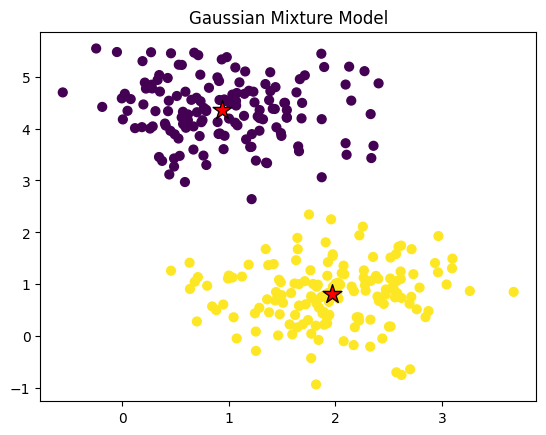

In [13]:
import matplotlib.pyplot as plt
# 绘制数据点和聚类中心
plt.scatter(X[:, 0], X[:, 1], c=predictions, s=40, cmap='viridis')
# 从 parameters 字典访问均值
plt.scatter(gmm.parameters["mu"][:, 0], gmm.parameters["mu"][:, 1], s=200, marker='*', c='red', edgecolor='black')
plt.title('Gaussian Mixture Model')
plt.show()

GMM 类使用随机初始化方法初始化聚类中心和协方差矩阵。由于随机性的存在，第一次运行时，初始化的参数可能导致模型收敛到一个局部最优解，使得所有数据点都被分配到同一个簇中。而第二次运行时，由于初始化参数不同，模型可能会收敛到一个更好的解，从而得到正确的聚类结果。
为了解决这个问题，可以尝试以下几种方法：

1. 使用更稳定的初始化方法:

* 使用 k-means++ 算法初始化聚类中心。k-means++ 算法是一种改进的 k-means 算法，它可以更有效地初始化聚类中心，从而提高聚类效果和稳定性。
* 使用预先指定的聚类中心初始化模型。如果你对数据的先验知识比较了解，可以手动指定一些初始聚类中心，这样可以减少随机性的影响。

2. 多次运行模型并选择最佳结果:

* 运行模型多次，每次使用不同的随机数种子，然后选择 ELBO 值最高的模型作为最终结果。ELBO 值越高，表示模型拟合数据的效果越好。

3. 调整模型参数:

* 增加迭代次数 (max_iter)，使模型有更多的时间收敛到更好的解。
* 调整容差 (tol)，使模型对解的精度要求更高。

In [14]:
import numpy as np


def logsumexp(log_probs, axis=None):
    """
    计算对数概率的 logsumexp。

    该函数实现了 logsumexp 技巧，用于避免数值下溢。

    参数：
        log_probs: 对数概率数组。
        axis: 沿着哪个轴计算 logsumexp，默认为 None，表示计算所有元素的 logsumexp。

    返回值：
        对数概率的 logsumexp。

    思路：
        logsumexp 技巧的公式为：
        log(sum(exp(x_i))) = max(x_i) + log(sum(exp(x_i - max(x_i))))
        通过减去最大值，可以避免 exp(x_i) 出现数值上溢，从而提高计算精度。
    """
    _max = np.max(log_probs)  # 找到最大值
    ds = log_probs - _max  # 减去最大值
    exp_sum = np.exp(ds).sum(axis=axis)  # 计算 exp 的和
    return _max + np.log(exp_sum)  # 加回最大值


#def log_gaussian_pdf(x_i, mu, sigma):
#    """
#    计算多元高斯分布的对数概率密度函数。
#
#    参数：
#        x_i: 数据点，形状为 (d,)，其中 d 是数据点的维度。
#        mu: 均值向量，形状为 (d,)。
#        sigma: 协方差矩阵，形状为 (d, d)。
#
#    返回值：
#        数据点 x_i 在多元高斯分布下的对数概率密度。
#
#    思路：
#        多元高斯分布的对数概率密度函数公式为：
#        log N(x_i | mu, sigma) = -0.5 * (d * log(2 * pi) + log(det(sigma)) + (x_i - mu)^T * sigma^-1 * (x_i - mu))
#        其中 d 是数据点的维度，det(sigma) 是协方差矩阵的行列式，sigma^-1 是协方差矩阵的逆矩阵。
#        为了避免数值问题，可以使用 `slogdet` 函数计算协方差矩阵的行列式的对数，
#        使用 `solve` 函数计算协方差矩阵的逆矩阵与向量的乘积。
#    """
#    n = len(mu)  # 数据点的维度
#    a = n * np.log(2 * np.pi)  # 常数项
#    _, b = np.linalg.slogdet(sigma)  # 计算协方差矩阵的行列式的对数
#
#    # 计算 (x_i - mu)^T * sigma^-1 * (x_i - mu)
#    y = np.linalg.solve(sigma, x_i - mu)  # 计算 sigma^-1 * (x_i - mu)
#    c = np.dot(x_i - mu, y)  # 计算 (x_i - mu)^T * y
#
#    return -0.5 * (a + b + c)  # 返回对数概率密度



def log_gaussian_pdf(x_i, mu, sigma):
    """
    计算多元高斯分布的对数概率密度函数。
    """
    n = len(mu)  # 数据点的维度
    det_sigma = np.linalg.det(sigma)  # 计算协方差矩阵的行列式

    if det_sigma == 0:  # 如果协方差矩阵奇异，返回负无穷
        return -np.inf

    inv_sigma = np.linalg.inv(sigma)  # 计算协方差矩阵的逆矩阵

    # 计算 (x_i - mu)^T * sigma^-1 * (x_i - mu)
    diff = x_i - mu
    exponent = -0.5 * diff.T @ inv_sigma @ diff

    # 计算对数似然值
    log_likelihood = -0.5 * (n * np.log(2 * np.pi) + np.log(det_sigma)) + exponent

    return log_likelihood



import numpy as np
from sklearn.cluster import KMeans

class GMM(object):
    """高斯混合模型 (GMM) 类，使用期望最大化 (EM) 算法进行训练。"""
    def __init__(self, C=3, seed=None):
        """初始化 GMM 对象。"""
        self.elbo = None
        self.parameters = {}
        self.hyperparameters = {
            "C": C,  # 高斯混合模型中簇/混合成分的数量
            "seed": seed,  # 随机数生成器的种子
        }
        self.is_fit = False  # 模型是否已拟合的标志

        if seed:
            np.random.seed(seed)

#    def _initialize_params(self, X):
#        """随机初始化 GMM 参数。"""
#        N, d = X.shape
#        C = self.hyperparameters["C"]
#
#        rr = np.random.rand(C)
#
#        self.parameters = {
#            "pi": rr / rr.sum(),  # 簇的先验概率
#            "Q": np.zeros((N, C)),  # 变分分布 q(T)
#            "mu": np.random.uniform(-5, 10, C * d).reshape(C, d),  # 簇的均值
#            "sigma": np.array([np.eye(d) for _ in range(C)]),  # 簇的协方差矩阵
#        }
#
#        self.elbo = None
#        self.is_fit = False


    def _initialize_params(self, X):
        """使用 k-means++ 初始化 GMM 参数。"""
        N, d = X.shape
        C = self.hyperparameters["C"]

        # 使用 k-means++ 初始化聚类中心
        kmeans = KMeans(n_clusters=C, init='k-means++', random_state=self.hyperparameters["seed"])
        kmeans.fit(X)
        self.parameters["mu"] = kmeans.cluster_centers_

        # 初始化其他参数
        rr = np.random.rand(C)
        self.parameters["pi"] = rr / rr.sum()
        self.parameters["Q"] = np.zeros((N, C))
        self.parameters["sigma"] = np.array([np.eye(d) for _ in range(C)])

        self.elbo = None
        self.is_fit = False

    def fit(self, X, max_iter=100, tol=1e-3):
        """使用期望最大化 (EM) 算法拟合高斯混合模型。"""
        self._initialize_params(X)
        prev_elbo = -np.inf

        for _ in range(max_iter):
            self._e_step(X)
            self._m_step(X)
            self.elbo = self._compute_elbo(X)

            if np.abs(self.elbo - prev_elbo) <= tol:
                break

            prev_elbo = self.elbo

        self.is_fit = True

    def _e_step(self, X):
        """执行 E 步：计算后验概率。"""
        for i in range(X.shape[0]):
            for c in range(self.hyperparameters["C"]):
                pi_c = self.parameters["pi"][c]
                mu_c = self.parameters["mu"][c]
                sigma_c = self.parameters["sigma"][c]

                log_likelihood = log_gaussian_pdf(X[i], mu_c, sigma_c)

                self.parameters["Q"][i, c] = np.log(pi_c) + log_likelihood

            log_likelihood_sum = logsumexp(self.parameters["Q"][i])
            self.parameters["Q"][i] = np.exp(self.parameters["Q"][i] - log_likelihood_sum)

#    def _m_step(self, X):
#        """执行 M 步：更新参数。"""
#        N = X.shape[0]
#        C = self.hyperparameters["C"]
#        d = X.shape[1]
#        reg_covar = 1e-6  # 正则化系数
#
#        for c in range(C):
#            self.parameters["pi"][c] = np.sum(self.parameters["Q"][:, c]) / N
#
#            weighted_sum = np.zeros(d)
#            for i in range(N):
#                weighted_sum += self.parameters["Q"][i, c] * X[i]
#            self.parameters["mu"][c] = weighted_sum / np.sum(self.parameters["Q"][:, c])
#
#            weighted_sum_sq_diff = np.zeros((d, d))
#            for i in range(N):
#                diff = X[i] - self.parameters["mu"][c]
#                weighted_sum_sq_diff += self.parameters["Q"][i, c] * np.outer(diff, diff)
#            self.parameters["sigma"][c] = weighted_sum_sq_diff / np.sum(self.parameters["Q"][:, c]) + reg_covar * np.eye(d) # 添加正则化项
#


    def _m_step(self, X):
        """执行 M 步：更新参数。"""
        N = X.shape[0]
        C = self.hyperparameters["C"]
        d = X.shape[1]
        reg_covar = 1e-6  # 正则化系数

        for c in range(C):
            # 更新簇的先验概率
            self.parameters["pi"][c] = np.sum(self.parameters["Q"][:, c]) / N

            # 更新簇的均值
            weighted_sum = np.zeros(d)
            for i in range(N):
                weighted_sum += self.parameters["Q"][i, c] * X[i]
            self.parameters["mu"][c] = weighted_sum / np.sum(self.parameters["Q"][:, c])

            # 更新簇的协方差矩阵,此处修改为对每个簇分别计算
            weighted_sum_sq_diff = np.zeros((d, d))
            for i in range(N):
                diff = X[i] - self.parameters["mu"][c]
                weighted_sum_sq_diff += self.parameters["Q"][i, c] * np.outer(diff, diff)

            # 使用该簇对应的权重总和而不是所有权重的总和进行归一化
            self.parameters["sigma"][c] = weighted_sum_sq_diff / np.sum(self.parameters["Q"][:, c]) + reg_covar * np.eye(d)


    def _compute_elbo(self, X):
        """计算证据下界 (ELBO)。"""
        elbo = 0
        N = X.shape[0]
        C = self.hyperparameters["C"]

        for i in range(N):
            for c in range(C):
                pi_c = self.parameters["pi"][c]
                mu_c = self.parameters["mu"][c]
                sigma_c = self.parameters["sigma"][c]
                q_ic = self.parameters["Q"][i, c]

                log_likelihood = log_gaussian_pdf(X[i], mu_c, sigma_c)

                elbo += q_ic * (np.log(pi_c) + log_likelihood - np.log(q_ic))

        return elbo

    def predict(self, X):
        """预测数据点属于哪个高斯成分。"""
        if not self.is_fit:
            raise RuntimeError("必须先拟合模型才能进行预测。")

        N = X.shape[0]
        C = self.hyperparameters["C"]
        predictions = np.zeros(N, dtype=int)

        for i in range(N):
            posterior_probs = np.zeros(C)
            for c in range(C):
                pi_c = self.parameters["pi"][c]
                mu_c = self.parameters["mu"][c]
                sigma_c = self.parameters["sigma"][c]

                log_likelihood = log_gaussian_pdf(X[i], mu_c, sigma_c)

                posterior_probs[c] = np.log(pi_c) + log_likelihood

            predictions[i] = np.argmax(posterior_probs)

        return predictions



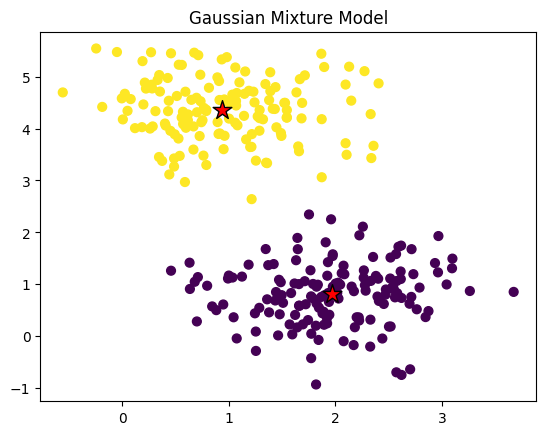

In [15]:

import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

gmm = GMM(C=2)  # 假设您想要找到 2 个聚类
gmm.fit(X)  # 拟合模型

predictions = gmm.predict(X)  # 进行预测

import matplotlib.pyplot as plt
# 绘制数据点和聚类中心
plt.scatter(X[:, 0], X[:, 1], c=predictions, s=40, cmap='viridis')
# 从 parameters 字典访问均值
plt.scatter(gmm.parameters["mu"][:, 0], gmm.parameters["mu"][:, 1], s=200, marker='*', c='red', edgecolor='black')
plt.title('Gaussian Mixture Model')
plt.show()

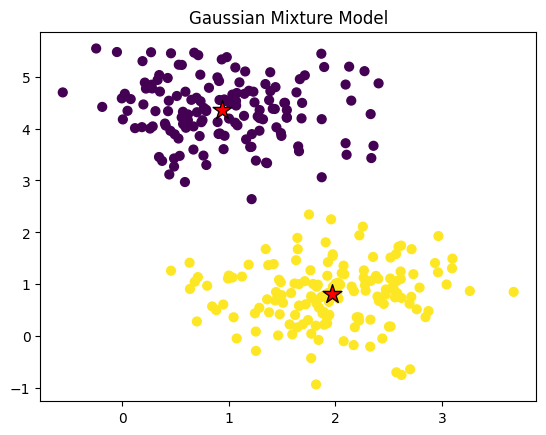

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 生成具有两个聚类的样本数据
X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# 创建一个具有两个成分的高斯混合模型
gmm = GaussianMixture(n_components=2, random_state=0)

# 使用样本数据训练模型
gmm.fit(X)


# 预测每个数据点的聚类标签
labels = gmm.predict(X)

# 绘制数据点和聚类中心
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, marker='*', c='red', edgecolor='black')
plt.title('Gaussian Mixture Model')
plt.show()
